In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")
print(train.shape)

(891, 12)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
x=train['Age'].mean()
train['Age'].fillna(x,inplace=True)
xx=test['Age'].mean()
test['Age'].fillna(xx,inplace=True)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(train.loc[2,'Age'])

26.0


In [6]:
z=[]
for i in range(891):
    if(train.loc[i,'Sex']=='male'):
        z.append(0)
    else:
        z.append(1)
train['sex']=z

z=[]
for i in range(1309-891):
    if(test.loc[i,'Sex']=='male'):
        z.append(0)
    else:
        z.append(1)
test['sex']=z

In [7]:
train=train.drop(['Name','Embarked','Ticket','Cabin','Sex','PassengerId'],axis=1)
test=test.drop(['Name','Embarked','Ticket','Cabin','Sex'],axis=1)
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   sex       891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   sex          418 non-null    int64  
dtypes:

In [8]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex
0,892,3,34.5,0,0,7.8292,0
1,893,3,47.0,1,0,7.0000,1
2,894,2,62.0,0,0,9.6875,0
3,895,3,27.0,0,0,8.6625,0
4,896,3,22.0,1,1,12.2875,1


In [9]:
from sklearn.model_selection import train_test_split
X=train.drop('Survived',axis=1).values
y=train['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


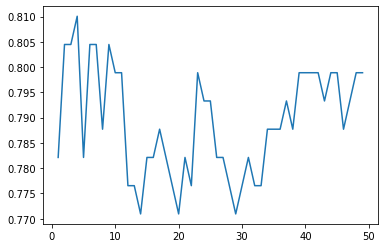

In [11]:
import matplotlib.pyplot as plt
l=[]
p=[]
for g in range(1,50):
    steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors=g))]
    pipeline = Pipeline(steps)
    knn_scaled = pipeline.fit(X_train, y_train)
    cc=knn_scaled.score(X_test,y_test)
    l.append(cc)
    p.append(g)

plt.plot(p,l)
plt.show()

In [12]:
print(l[3])   ###MAX ACC FOR 4 NEIGHBORS

0.8100558659217877


In [13]:
steps2 = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=4))]
        
# Create the pipeline: pipeline
pipeline2 = Pipeline(steps)
knn_scaled2 = pipeline.fit(X_train, y_train)

print(knn_scaled2.score(X_test,y_test))

0.7988826815642458


In [14]:
x=test.Fare.mean()
test['Fare'].fillna(x,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   sex          418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [15]:
c=test.drop('PassengerId',axis=1).values
predicted=knn_scaled2.predict(c)
test['Survived']=predicted
test


,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex,Survived
0,892,3,34.50000,0,0,7.8292,0,0
1,893,3,47.00000,1,0,7.0000,1,1
2,894,2,62.00000,0,0,9.6875,0,0
3,895,3,27.00000,0,0,8.6625,0,0
4,896,3,22.00000,1,1,12.2875,1,1
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,0
414,1306,1,39.00000,0,0,108.9000,1,1
415,1307,3,38.50000,0,0,7.2500,0,0
416,1308,3,30.27259,0,0,8.0500,0,0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

In [17]:
##USING RANDOM FOREST REGRESSOR 
rf=RandomForestClassifier(random_state=42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [18]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [19]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [20]:
rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished


{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [21]:
realrf=RandomForestClassifier(n_estimators= 2000,min_samples_split=2,min_samples_leaf= 4,max_features='auto',max_depth= 30,bootstrap= False)

In [22]:
realrf.fit(X_train,y_train)
print(realrf.score(X_test,y_test))

0.8324022346368715


In [23]:
steps3 = [('scaler', StandardScaler()),
        ('rfrf', RandomForestClassifier(n_estimators= 2000,min_samples_split=2,min_samples_leaf= 4,max_features='auto',max_depth= 30,bootstrap= False))]
        
# Create the pipeline: pipeline
pipeline3 = Pipeline(steps3)
rf_scale= pipeline3.fit(X_train, y_train)

print(rf_scale.score(X_test,y_test))

0.8324022346368715


In [24]:

dfs=pd.DataFrame({'PassengerId':test['PassengerId'].values,'Survived':rf_scale.predict(test.drop(['PassengerId','Survived'],axis=1).values)})

In [25]:
xd=dfs.to_csv('abcd.csv',index=False)